<a href="https://colab.research.google.com/github/krishnareddyalavala/Data-Science-models/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inco

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train=X_train.astype('float32')/255.0
print("Training data shape:", X_train.shape)


Training data shape: (50000, 32, 32, 3)


In [ ]:
X_test=X_test.astype('float32')/255.0
print("Testing data shape:",X_test.shape)

Testing data shape: (10000, 32, 32, 3)


In [ ]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]


/tmp/ipython-input-3073989667.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[i])])


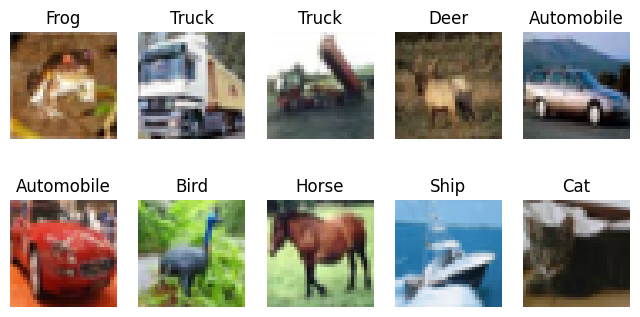

In [ ]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[int(y_train[i])])
    plt.axis("off")
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])




model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=128)


Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 273ms/step - accuracy: 0.3334 - loss: 1.7998 - val_accuracy: 0.4750 - val_loss: 1.4183
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 277ms/step - accuracy: 0.5635 - loss: 1.2231 - val_accuracy: 0.6016 - val_loss: 1.1365
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 267ms/step - accuracy: 0.6478 - loss: 0.9989 - val_accuracy: 0.6752 - val_loss: 0.9383
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 143s 271ms/step - accuracy: 0.7017 - loss: 0.8558 - val_accuracy: 0.7166 - val_loss: 0.8388
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.7343 - loss: 0.7645 - val_accuracy: 0.7340 - val_loss: 0.7901
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.7606 - loss: 0.6905 - val_accuracy: 0.7226 - val_loss: 0.7905
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 147s 282ms/step - accuracy: 0.7841 - loss: 0.6286 - val_accuracy: 0.7460 - val_loss: 0.7629
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 271ms/step - accuracy: 0.8030 - los

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7402 - loss: 2.3844
Test Accuracy: 0.7337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/tmp/ipython-input-191353564.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")


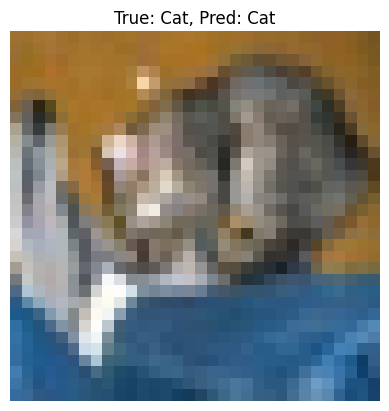

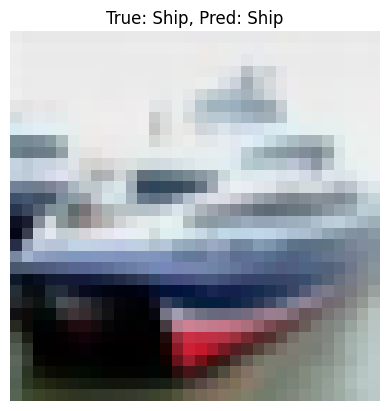

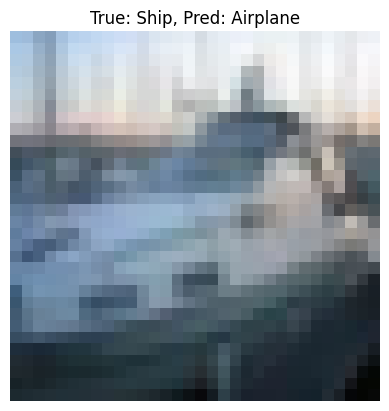

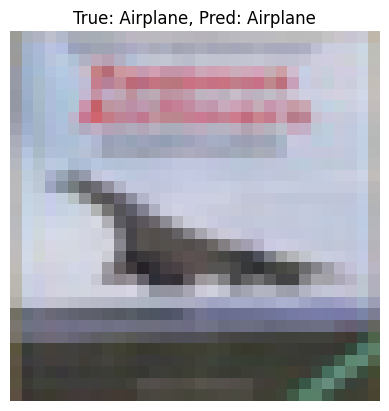

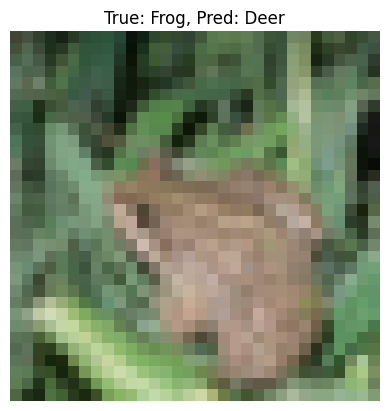

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()